In [12]:
import json

import pandas as pd
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 \
  import Features, EntitiesOptions, KeywordsOptions, EmotionOptions

natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='06320980-d791-4920-834b-3c5368522608',
  password='UKVXqFnwnNnZ',
  version='2018-03-16')


### Function to Read

In [2]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'ascii'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [44]:
moviename = 'Highway.pdf'
path = '../Bollywood-Data-master/scripts-data/' + moviename

In [50]:
movienames = ['Haider.pdf', 'Highway.pdf', 'JabWeMet.pdf', 'Kaminey.pdf', 'Maqbool.pdf', 'Masaan.pdf', 'NEERJA.pdf', 'Pink.pdf', 'Queen.pdf', 'Raman Raghav 2_0.pdf', 'Rang De Basanti Script - Film Companion-min.pdf', 'Rockstar.pdf']

In [45]:
text = convert_pdf_to_txt(path)

In [46]:
print(type(text))
print(len(text))

<class 'str'>
129504


### Split text based on scenes

In [47]:
dic = {}
dic['Haider.pdf'] = 'CUT TO'
dic['Highway.pdf'] = 'Sc # '
dic['JabWeMet.pdf'] = 'Sc # '
dic['Kaminey.pdf'] = 'CUT TO'
dic['Maqbool.pdf'] = 'SC. '
dic['Masaan.pdf'] = 'CUT TO'
dic['NEERJA.pdf'] = 'CUT TO'
dic['Pink.pdf'] = 'CUT TO'
dic['Queen.pdf'] = 'CUT TO'
dic['Raman Raghav 2_0.pdf'] = 'CUT TO'
dic['Rang De Basanti Script - Film Companion-min.pdf'] = 'CUT TO'
dic['Rockstar.pdf'] = 'Sc # '
dic

{'Haider.pdf': 'CUT TO',
 'Highway.pdf': 'Sc # ',
 'JabWeMet.pdf': 'Sc # ',
 'Kaminey.pdf': 'CUT TO',
 'Maqbool.pdf': 'SC. ',
 'Masaan.pdf': 'CUT TO',
 'NEERJA.pdf': 'CUT TO',
 'Pink.pdf': 'CUT TO',
 'Queen.pdf': 'CUT TO',
 'Raman Raghav 2_0.pdf': 'CUT TO',
 'Rang De Basanti Script - Film Companion-min.pdf': 'CUT TO',
 'Rockstar.pdf': 'Sc # '}

In [48]:
delimiter = dic[moviename]
text2 = text.split(delimiter)

In [49]:
print(type(text2))
print(len(text2))


<class 'list'>
73


In [53]:
for moviename in movienames:
    path = '../Bollywood-Data-master/scripts-data/' + moviename
    print(moviename)

    text = convert_pdf_to_txt(path)
    delimiter = dic[moviename]
    text2 = text.split(delimiter)
    print(len(text2))


Haider.pdf
139
Highway.pdf
73
JabWeMet.pdf
88
Kaminey.pdf
99
Maqbool.pdf
84
Masaan.pdf
175
NEERJA.pdf
65
Pink.pdf
110
Queen.pdf
137
Raman Raghav 2_0.pdf
76
Rang De Basanti Script - Film Companion-min.pdf
23
Rockstar.pdf
161


##### Note: There are supposed to be 74 scene for JabWeMet, but ofc the delimiter has to be something better

#### Creating a table to dump the values into

In [34]:
main_table = pd.DataFrame()


In [35]:
for i,txt in enumerate(text2):
    try:
        response = natural_language_understanding.analyze(
          text = txt,
          features=Features(
            emotion=EmotionOptions())).get_result()
        mbst = response['emotion']['document']['emotion']
        mbst['scene'] = i

        table1 = pd.DataFrame.from_dict(mbst, orient='index').squeeze()

        main_table = main_table.append(table1)
    except:
        main_table = main_table.append({'anger':0, 'disgust':0,'fear':0, 'joy':0,'sadness':0, 'scene':i}, ignore_index=True)



<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy  sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.41491    0.0
<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0  0.094086  0.065596  0.111935  0.702814  0.110925    2.0
<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0  0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0  0.300228  0.072830  0.254652  0.107095  0.067761    3.0
<class 'pandas.core.series.Serie

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0  0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0  0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0  0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0  0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0  0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0  0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0  0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0  0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0  0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0  0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0  0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0  0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0  0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0  0.099039  0.46863

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0  0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0  0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0  0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0  0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0  0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0  0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0  0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0  0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0  0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0  0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0  0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0  0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0  0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0  0.099039  0.46863

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0  0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0  0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0  0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0  0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0  0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0  0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0  0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0  0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0  0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0  0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0  0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0  0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0  0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0  0.099039  0.46863

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0  0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0  0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0  0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0  0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0  0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0  0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0  0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0  0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0  0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0  0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0  0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0  0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0  0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0  0.099039  0.46863

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0  0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0  0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0  0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0  0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0  0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0  0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0  0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0  0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0  0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0  0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0  0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0  0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0  0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0  0.099039  0.46863

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0  0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0  0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0  0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0  0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0  0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0  0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0  0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0  0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0  0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0  0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0  0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0  0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0  0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0  0.099039  0.46863

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0  0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0  0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0  0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0  0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0  0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0  0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0  0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0  0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0  0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0  0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0  0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0  0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0  0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0  0.099039  0.46863

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0  0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0  0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0  0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0  0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0  0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0  0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0  0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0  0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0  0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0  0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0  0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0  0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0  0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0  0.099039  0.46863

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0  0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0  0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0  0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0  0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0  0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0  0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0  0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0  0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0  0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0  0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0  0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0  0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0  0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0  0.099039  0.46863

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0  0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0  0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0  0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0  0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0  0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0  0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0  0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0  0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0  0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0  0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0  0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0  0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0  0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0  0.099039  0.46863

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0  0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0  0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0  0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0  0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0  0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0  0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0  0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0  0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0  0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0  0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0  0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0  0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0  0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0  0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0  0.099039  0.46863

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0   0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0   0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0   0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0   0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0   0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0   0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0   0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0   0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0   0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0   0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0   0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0   0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0   0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0   0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0   

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0   0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0   0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0   0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0   0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0   0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0   0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0   0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0   0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0   0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0   0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0   0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0   0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0   0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0   0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0   

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0   0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0   0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0   0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0   0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0   0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0   0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0   0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0   0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0   0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0   0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0   0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0   0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0   0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0   0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0   

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0   0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0   0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0   0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0   0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0   0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0   0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0   0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0   0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0   0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0   0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0   0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0   0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0   0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0   0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0   

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.066618  0.057476  0.442381  0.634893  0.414910    0.0
0   0.145612  0.081604  0.137676  0.172231  0.191764    1.0
0   0.094086  0.065596  0.111935  0.702814  0.110925    2.0
0   0.300228  0.072830  0.254652  0.107095  0.067761    3.0
0   0.095563  0.039239  0.072659  0.574170  0.143649    4.0
0   0.130034  0.086034  0.609435  0.488297  0.180526    5.0
0   0.191047  0.161758  0.129919  0.179350  0.196402    6.0
0   0.115081  0.091458  0.151712  0.515791  0.508621    7.0
0   0.505430  0.116101  0.623707  0.654207  0.133762    8.0
0   0.098487  0.095724  0.084078  0.126572  0.125597    9.0
0   0.137806  0.156145  0.147589  0.482580  0.187256   10.0
0   0.564238  0.098597  0.114442  0.517593  0.444451   11.0
0   0.575980  0.089607  0.113226  0.544167  0.150175   12.0
0   0.153309  0.113420  0.132347  0.187515  0.137937   13.0
0   0.140481  0.145821  0.127419  0.128022  0.196563   14.0
0   

In [36]:
main_table

,anger,disgust,fear,joy,sadness,scene
0,0.066618,0.057476,0.442381,0.634893,0.414910,0.0
0,0.145612,0.081604,0.137676,0.172231,0.191764,1.0
0,0.094086,0.065596,0.111935,0.702814,0.110925,2.0
0,0.300228,0.072830,0.254652,0.107095,0.067761,3.0
0,0.095563,0.039239,0.072659,0.574170,0.143649,4.0
0,0.130034,0.086034,0.609435,0.488297,0.180526,5.0
0,0.191047,0.161758,0.129919,0.179350,0.196402,6.0
0,0.115081,0.091458,0.151712,0.515791,0.508621,7.0
0,0.505430,0.116101,0.623707,0.654207,0.133762,8.0
0,0.098487,0.095724,0.084078,0.126572,0.125597,9.0


In [37]:
main_table['scene'] = main_table['scene'].astype(int)
main_table = main_table.set_index('scene')

In [38]:
main_table

,anger,disgust,fear,joy,sadness
scene,,,,,
0,0.066618,0.057476,0.442381,0.634893,0.414910
1,0.145612,0.081604,0.137676,0.172231,0.191764
2,0.094086,0.065596,0.111935,0.702814,0.110925
3,0.300228,0.072830,0.254652,0.107095,0.067761
4,0.095563,0.039239,0.072659,0.574170,0.143649
5,0.130034,0.086034,0.609435,0.488297,0.180526
6,0.191047,0.161758,0.129919,0.179350,0.196402
7,0.115081,0.091458,0.151712,0.515791,0.508621
8,0.505430,0.116101,0.623707,0.654207,0.133762


#### Plot the graph, for each emotion(maybe)

In [39]:
emo = 'fear'

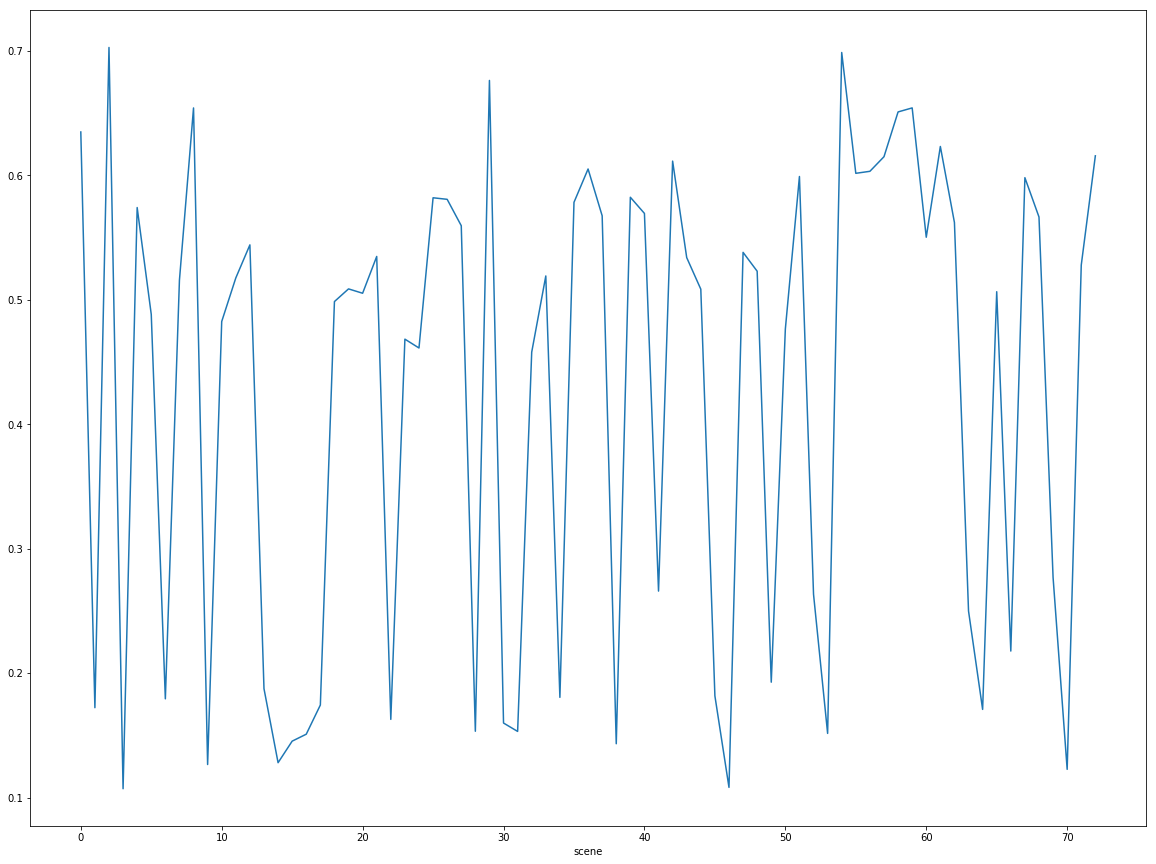

In [42]:
main_table.joy.plot(figsize = (20,15))